# Plots for the embeddings

In [51]:
from suppl import save_fig
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

## Reading embeddings

In [52]:
file_names = [
    './embeddings/enn_end_embeddings_untrained_2023-05-05_22-54.csv',
    './embeddings/enn_end_embeddings_trained_999_2023-05-05_22-54.csv'
]

file_names = [
    './embeddings/enn_action_embeddings_untrained_2023-05-05_22-54.csv',
    './embeddings/enn_action_embeddings_trained_999_2023-05-05_22-54.csv'
]

file_names = [
    './embeddings/gcnn_end_embeddings_untrained_2023-05-05_15-03.csv',
    './embeddings/gcnn_end_embeddings_trained_999_2023-05-05_15-03.csv',
]

file_names = [
    './embeddings/gcnn_action_embeddings_untrained_2023-05-05_15-03.csv',
    './embeddings/gcnn_action_embeddings_trained_999_2023-05-05_15-03.csv',
]

architecture = file_names[0].split('/')[2].split('_')[0]
model = file_names[0].split('/')[2].split('_')[1]
timestamp = '_'.join(file_names[0].split('/')[2].split('.')[0].split('_')[-2:])

dfs = [pd.read_csv(x, sep='\t', header=None, index_col=None) for x in file_names]

Saving figure embeddings_before_after_action_gcnn_2023-05-05_15-03


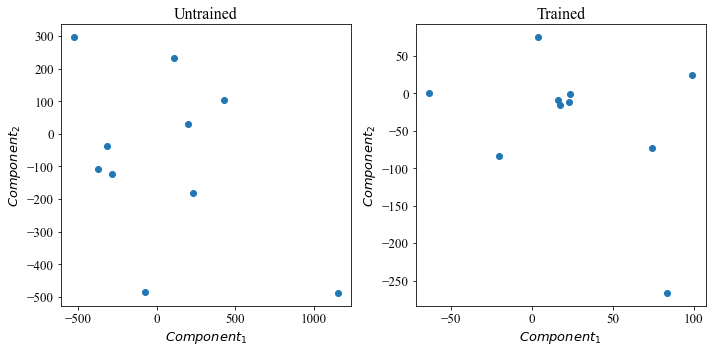

In [53]:
X_embedded_before = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, n_iter=1000, random_state=8).fit_transform(dfs[0])
X_embedded_after = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, n_iter=1000, random_state=42).fit_transform(dfs[1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Untrained', size=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(X_embedded_before[:, 0], X_embedded_before[:, 1])
plt.xlabel('$Component_1$', size=13)
plt.ylabel('$Component_2$', size=13)

plt.subplot(1, 2, 2)
plt.title('Trained', size=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(X_embedded_after[:, 0], X_embedded_after[:, 1])
plt.xlabel('$Component_1$', size=13)
plt.ylabel('$Component_2$', size=13)
save_fig(f'embeddings_before_after_{model}_{architecture}_{timestamp}')
plt.show()